<a href="https://colab.research.google.com/github/Misetsu/White-Blood-Cell-Classification/blob/main/WBC_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# インストール

In [1]:
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1
w = !apt install tree
print(w[-2])

Setting up tree (2.0.2-1) ...


# インポート

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
# PyTorch関連ライブラリのインポート

import torch
from torch import tensor
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets

In [4]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=5)

In [5]:
# GPUチェック

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# 共通関数の読み込み

In [6]:
# 共通関数のダウンロード
!git clone https://github.com/makaishi2/pythonlibs.git

# 共通関数のロード
from pythonlibs.torch_lib1 import *

# 共通関数の存在チェック
print(README)

Cloning into 'pythonlibs'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 112 (delta 0), reused 2 (delta 0), pack-reused 108
Receiving objects: 100% (112/112), 21.12 MiB | 23.43 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Common Library for PyTorch
Author: M. Akaishi


In [7]:
!tree pythonlibs

pythonlibs
├── images
│   ├── dog_wolf_old.zip
│   └── dog_wolf.zip
├── LICENSE
├── README.md
└── torch_lib1
    ├── __init__.py
    └── __pycache__
        └── __init__.cpython-310.pyc

3 directories, 6 files


In [8]:
!cat pythonlibs/torch_lib1/__init__.py

# 共通関数定義
# Apache License Version 2.0
# https://www.apache.org/licenses/LICENSE-2.0.html

# ReadMe
README = 'Common Library for PyTorch\nAuthor: M. Akaishi'

import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

import torch
from torch import tensor
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
from tqdm.notebook import tqdm

# 損失関数値計算用
def eval_loss(loader, device, net, criterion):
  
    # DataLoaderから最初の1セットを取得する
    for images, labels in loader:
        break

    # デバイスの割り当て
    inputs = images.to(device)
    labels = labels.to(device)

    # 予測値の計算
    outputs = net(inputs)

    #  損失値の計算
    loss = criterion(outputs, labels)

    return loss
  

# 学習用関数
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    base_epochs = len(history)
  
    for epoc

# データセット読み込み

https://raabindata.com/free-data/#double-labeled-cropped-cells

データは上記のサイトからお借りしました。

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [11]:
!unrar x "/content/drive/MyDrive/Colab/Train.rar"

ストリーミング出力は最後の 5000 行に切り捨てられました。
Extracting  Train/Neutrophil/95-8-1-1_256_1.jpg                           51%  OK 
Extracting  Train/Neutrophil/95-8-1-1_257_1.jpg                           51%  OK 
Extracting  Train/Neutrophil/95-8-1-1_259_1.jpg                           51%  OK 
Extracting  Train/Neutrophil/95-8-1-1_25_1.jpg                            51%  OK 
Extracting  Train/Neutrophil/95-8-1-1_265_1.jpg                           51%  OK 
Extracting  Train/Neutrophil/95-8-1-1_268_1.jpg                           52%  OK 
Extracting  Train/Neutrophil/95-8-1-1_269_1.jpg                           52%  OK 
Extracting  Train/Neutrophil/95-8-1-1_270_1.jpg                           52%  OK 
Extracting  Train/Neutrophil/95-8-1-1_274_3.jpg                           52%  OK 
Extracting  Train/Neutrophil/95-8-1-1_275_2.jpg                           52%  OK 
Extracting  Train/Neutrophil/95-8-1-1_276_1.jpg 

In [12]:
!unrar x "/content/drive/MyDrive/Colab/TestA.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Colab/TestA.rar

Creating    TestA                                                     OK
Creating    TestA/Basophil                                            OK
Extracting  TestA/Basophil/20190526_163027_0.jpg                           0%  OK 
Extracting  TestA/Basophil/20190526_163055_0.jpg                           0%  OK 
Extracting  TestA/Basophil/20190526_163055_1.jpg                           0%  OK 
Extracting  TestA/Basophil/20190526_163055_2.jpg                           0%  OK 
Extracting  TestA/Basophil/20190526_163545_0.jpg                           0%  OK 
Extracting  TestA/Basophil/20190526_163656_0.jpg                           0%  OK 
Extracting  TestA/Basophil/20190526_163835_0.jpg                           0%  OK 
Extracting  TestA/Basophil/20190526_163835_1.jpg                          

In [13]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

In [14]:
train_dir = "/content/Train"
test_dir = "/content/TestA"

classes = ['B', 'E', 'L', 'M', 'N']

train_data = datasets.ImageFolder(train_dir,
            transform=train_transform)
train_data2 = datasets.ImageFolder(train_dir,
            transform=test_transform)
test_data = datasets.ImageFolder(test_dir,
            transform=test_transform)

In [15]:
# データ件数確認

print(f'学習データ: {len(train_data)}件')
print(f'検証データ: {len(test_data)}件')

学習データ: 10175件
検証データ: 4339件


In [16]:
batch_size = 32

train_loader = DataLoader(train_data,
            batch_size=batch_size, shuffle=True)

train_loader2 = DataLoader(train_data2,
            batch_size=40, shuffle=True)

test_loader = DataLoader(test_data,
            batch_size=batch_size, shuffle=False)

test_loader2 = DataLoader(test_data,
            batch_size=20, shuffle=True)

さっくり紹介

Monocyte - 長生き（比較的に）、細菌を分解する

Lymphocyte - 抗体産生する、がん細胞などと戦ってくれる

Neutrophil - 数が一番多い、細菌を分解する

Basophil - サイズが小さい、化学物質を産生で免疫機能のバランスを保つ

Eosinophil - アレルギー反応を起こす

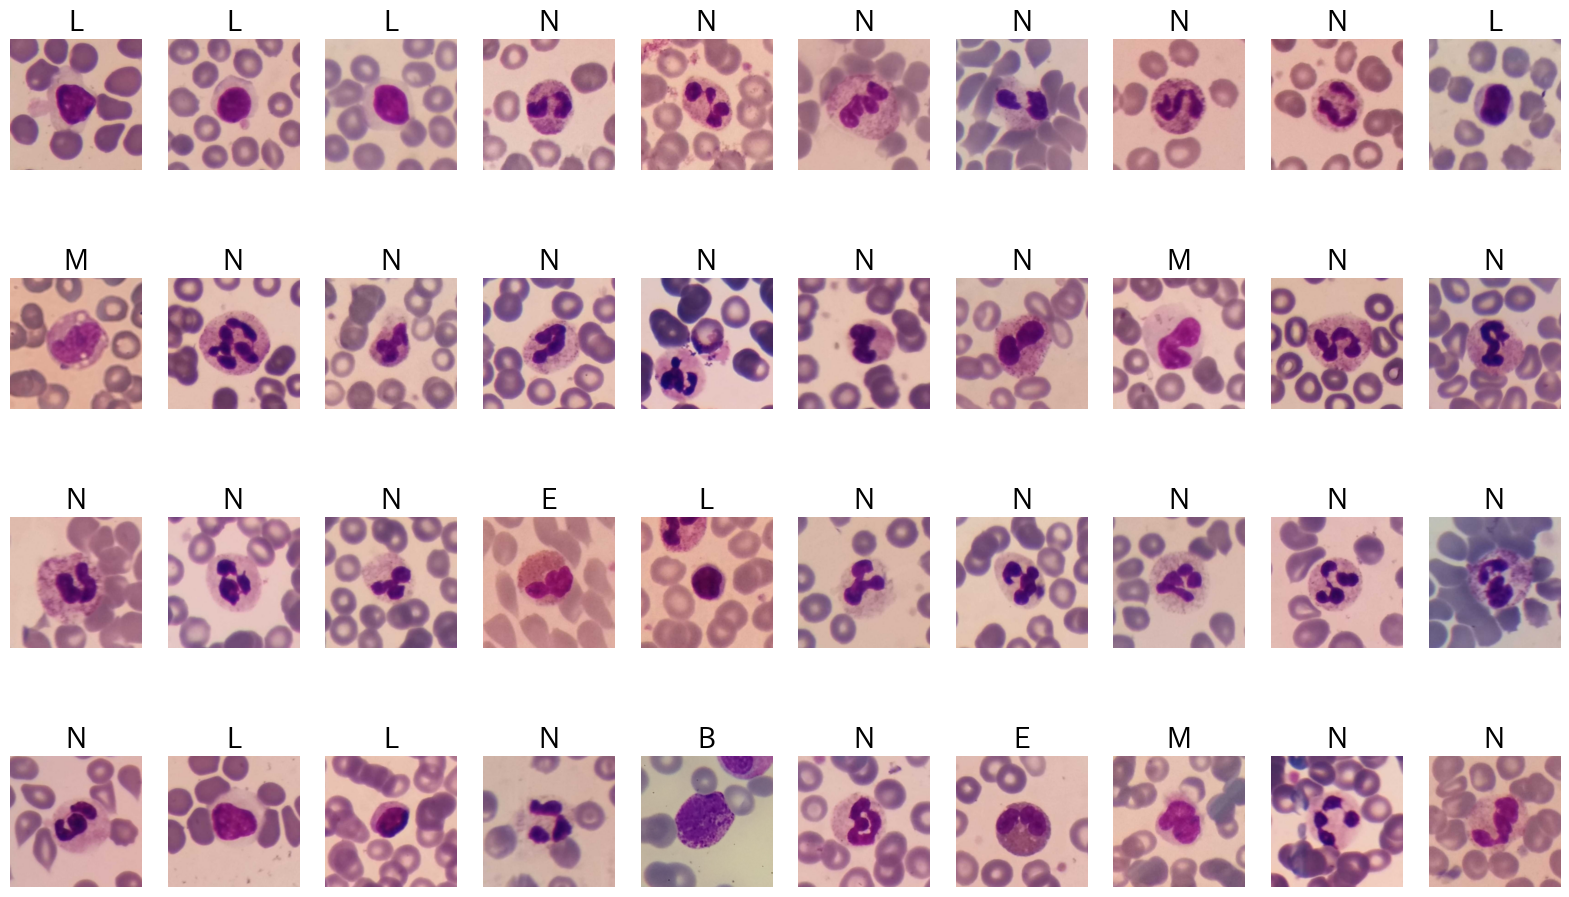

In [17]:
# 訓練用データ(４0件)
show_images_labels(train_loader2, classes, None, None)

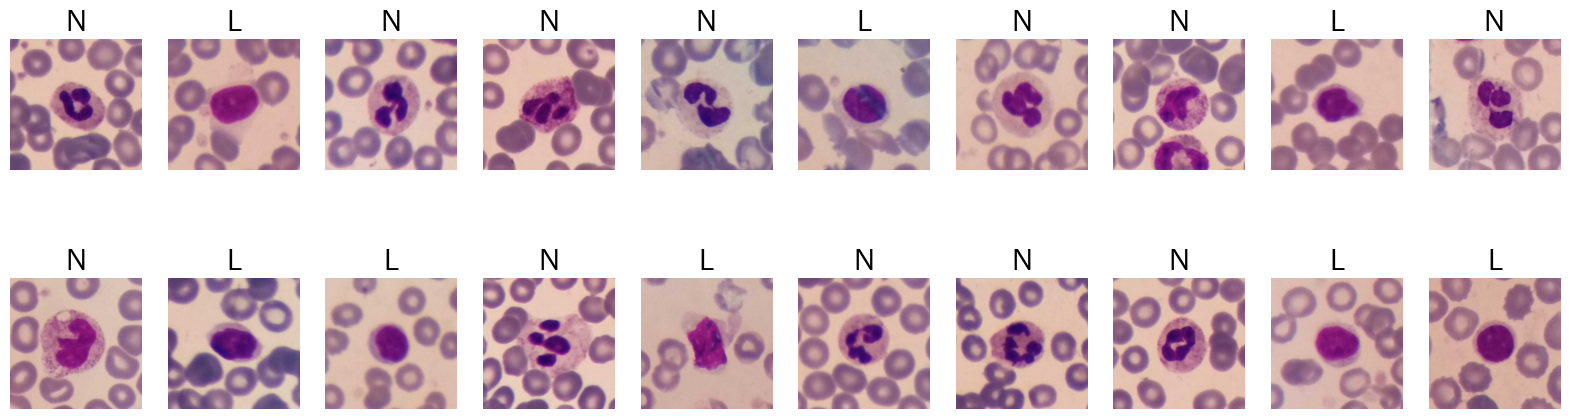

In [18]:
# 検証用データ(10件)
torch_seed()
show_images_labels(test_loader2, classes, None, None)

# モデル

## 学習済みvgg19

In [19]:
# 学習済みモデルの読み込み
from torchvision import models
net = models.vgg19_bn(pretrained = True)

for param in net.parameters():
    param.requires_grad = False

torch_seed()

in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, 5)

net.avgpool = nn.Identity()

net = net.to(device)

lr = 0.001
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.classifier[6].parameters(),lr=lr,momentum=0.9)

history = np.zeros((0, 5))

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:08<00:00, 64.8MB/s]


In [20]:
num_epochs = 10
history = fit(net, optimizer, criterion, num_epochs,
          train_loader, test_loader, device, history)

  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [1/10], loss: 0.83011 acc: 0.69543 val_loss: 0.60490, val_acc: 0.79350


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [2/10], loss: 0.70931 acc: 0.73622 val_loss: 0.55536, val_acc: 0.80018


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.67857 acc: 0.74408 val_loss: 0.54275, val_acc: 0.81470


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.66019 acc: 0.75017 val_loss: 0.52796, val_acc: 0.81885


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.66181 acc: 0.75233 val_loss: 0.53566, val_acc: 0.82000


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.65765 acc: 0.75361 val_loss: 0.50205, val_acc: 0.81586


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.64486 acc: 0.76079 val_loss: 0.54396, val_acc: 0.81862


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.63276 acc: 0.76354 val_loss: 0.47726, val_acc: 0.82484


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.63423 acc: 0.76727 val_loss: 0.51972, val_acc: 0.82761


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.64413 acc: 0.75931 val_loss: 0.52226, val_acc: 0.82208


初期状態: 損失: 0.60490 精度: 0.79350
最終状態: 損失: 0.52226 精度: 0.82208


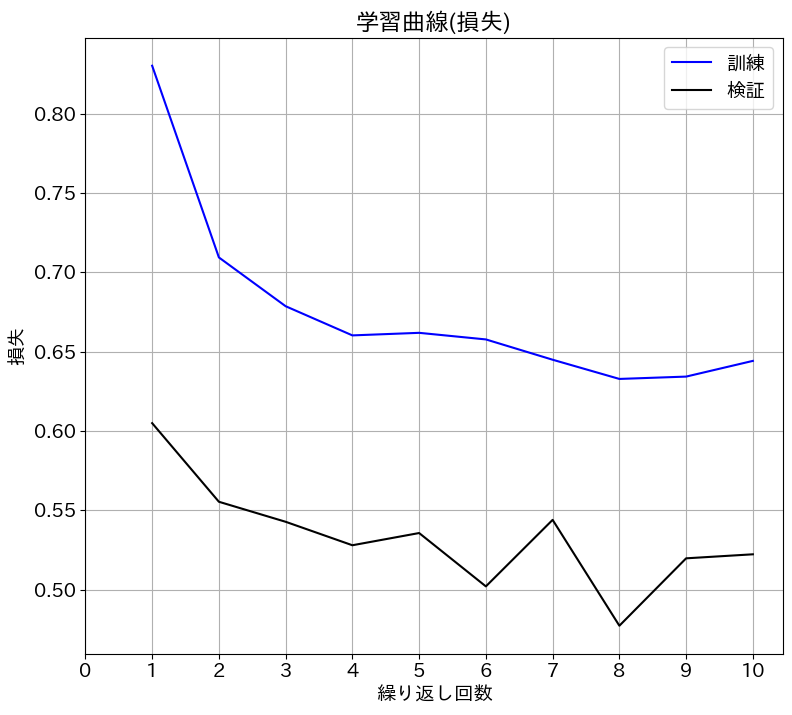

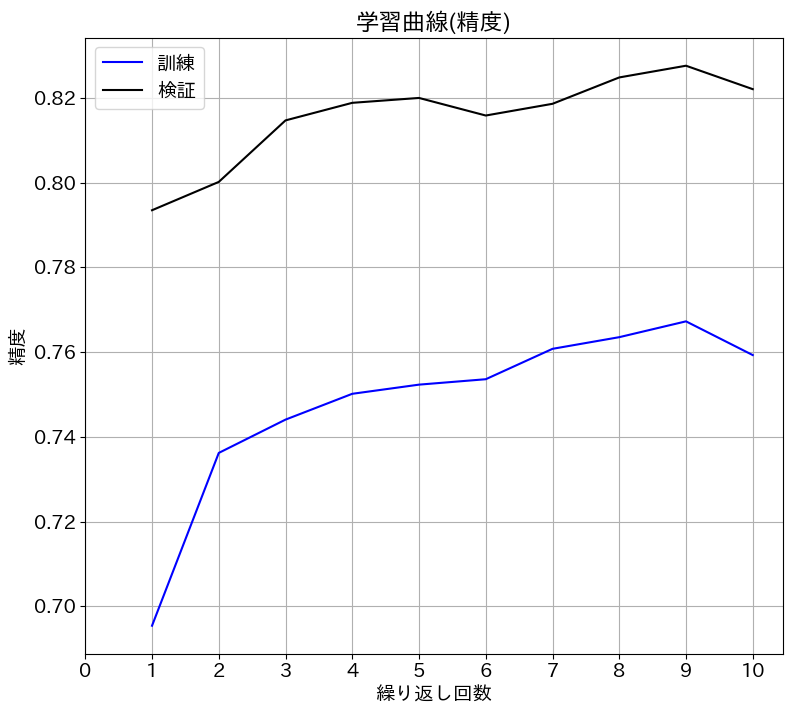

In [21]:
# 結果サマリー
evaluate_history(history)

## 学習済みresnet50

In [22]:
from torchvision import models
net = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 101MB/s]


In [23]:
net = models.resnet50(pretrained = True)

torch_seed()

net.fc = nn.Linear(2048, 5)

net = net.to(device)

lr = 0.001
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(),lr=lr,momentum=0.9)

history = np.zeros((0, 5))

In [24]:
num_epochs = 10
history = fit(net, optimizer, criterion, num_epochs,
          train_loader, test_loader, device, history)

  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [1/10], loss: 0.42008 acc: 0.85150 val_loss: 0.10097, val_acc: 0.96843


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [2/10], loss: 0.14586 acc: 0.95184 val_loss: 0.12172, val_acc: 0.96174


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.10312 acc: 0.96167 val_loss: 0.07515, val_acc: 0.97280


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.08468 acc: 0.96963 val_loss: 0.04945, val_acc: 0.98295


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.07738 acc: 0.97297 val_loss: 0.09580, val_acc: 0.96589


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.06789 acc: 0.97386 val_loss: 0.04359, val_acc: 0.98433


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.06066 acc: 0.97828 val_loss: 0.08238, val_acc: 0.97142


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.05205 acc: 0.98133 val_loss: 0.07610, val_acc: 0.97165


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.05201 acc: 0.98300 val_loss: 0.09718, val_acc: 0.96796


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.05257 acc: 0.98133 val_loss: 0.13787, val_acc: 0.95414


初期状態: 損失: 0.10097 精度: 0.96843
最終状態: 損失: 0.13787 精度: 0.95414


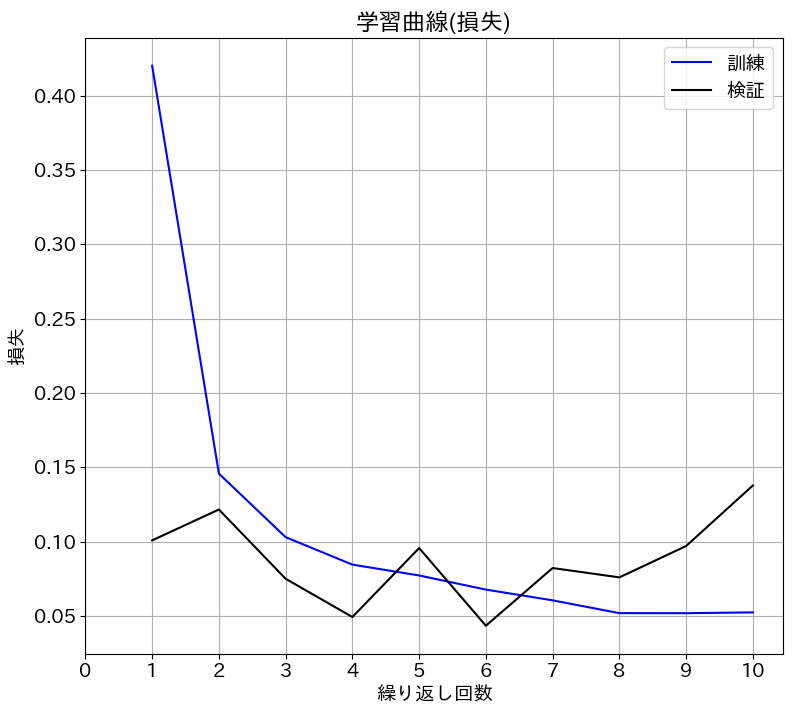

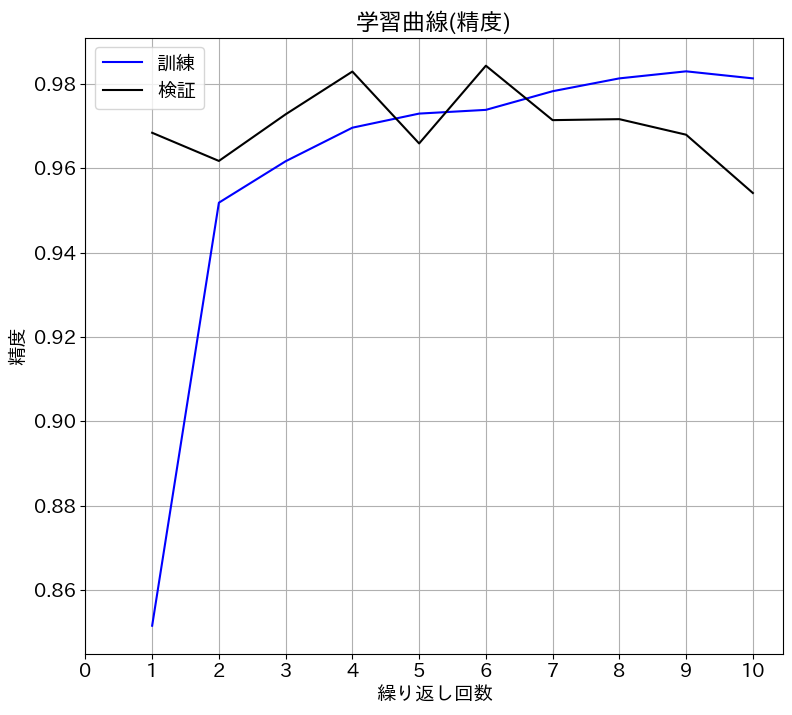

In [25]:
evaluate_history(history)

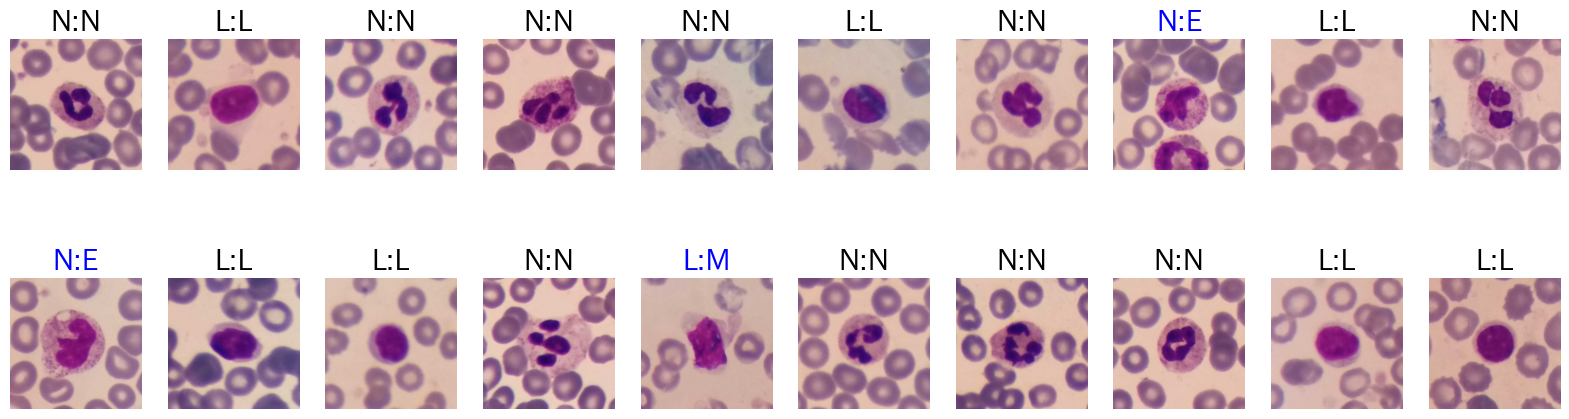

In [26]:
plt.rcParams['font.size'] = 8
torch_seed()
show_images_labels(test_loader2, classes, net, device)

## 自作vgg16

In [27]:
class vgg16(nn.Module):
  def __init__(self, n_output):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
    self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
    self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
    self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
    self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
    self.conv6 = nn.Conv2d(256, 256, 3, padding=1)
    self.conv7 = nn.Conv2d(256, 256, 3, padding=1)
    self.conv8 = nn.Conv2d(256, 512, 3, padding=1)
    self.conv9 = nn.Conv2d(512, 512, 3, padding=1)
    self.conv10 = nn.Conv2d(512, 512, 3, padding=1)
    self.conv11 = nn.Conv2d(512, 512, 3, padding=1)
    self.conv12 = nn.Conv2d(512, 512, 3, padding=1)
    self.conv13 = nn.Conv2d(512, 512, 3, padding=1)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d((2, 2), stride=(2, 2))
    self.flatten = nn.Flatten()
    self.l1 = nn.Linear(512*7*7, 4096)
    self.l2 = nn.Linear(4096, 1024)
    self.l3 = nn.Linear(1024, n_output)

    self.features = nn.Sequential(
        self.conv1, self.relu, self.conv2, self.relu, self.maxpool,
        self.conv3, self.relu, self.conv4, self.relu, self.maxpool,
        self.conv5, self.relu, self.conv6, self.relu, self.conv7, self.relu, self.maxpool,
        self.conv8, self.relu, self.conv9, self.relu, self.conv10, self.relu, self.maxpool,
        self.conv11, self.relu, self.conv12, self.relu, self.conv13, self.relu, self.maxpool
        )

    self.classifier = nn.Sequential(
       self.l1,
       self.relu,
       self.l2,
       self.relu,
       self.l3)

  def forward(self, x):
    x1 = self.features(x)
    x2 = self.flatten(x1)
    x3 = self.classifier(x2)
    return x3

In [28]:
net = vgg16(5).to(device)

In [29]:
print(net)

vgg16(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv13): Conv2d(512, 512, kernel_size=(3, 3),

In [30]:
# for param in net.parameters():
#     param.requires_grad = False

torch_seed()

lr = 0.01

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(),lr=lr)

history = np.zeros((0, 5))

In [31]:
num_epochs = 10
history = fit(net, optimizer, criterion, num_epochs,
          train_loader, test_loader, device, history)

  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [1/10], loss: 1.30107 acc: 0.61238 val_loss: 1.11885, val_acc: 0.61304


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.08733 acc: 0.61238 val_loss: 1.07494, val_acc: 0.61304


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [3/10], loss: 1.07554 acc: 0.61238 val_loss: 1.07328, val_acc: 0.61304


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [4/10], loss: 1.07482 acc: 0.61238 val_loss: 1.07233, val_acc: 0.61304


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [5/10], loss: 1.07442 acc: 0.61238 val_loss: 1.07291, val_acc: 0.61304


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [6/10], loss: 1.07453 acc: 0.61238 val_loss: 1.07209, val_acc: 0.61304


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [7/10], loss: 1.07450 acc: 0.61238 val_loss: 1.07215, val_acc: 0.61304


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [8/10], loss: 1.07427 acc: 0.61238 val_loss: 1.07231, val_acc: 0.61304


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [9/10], loss: 1.07442 acc: 0.61238 val_loss: 1.07276, val_acc: 0.61304


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [10/10], loss: 1.07445 acc: 0.61238 val_loss: 1.07216, val_acc: 0.61304
